In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.metrics import mean_squared_log_error, mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor 

In [2]:
data=pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Some variables are numerical where they should be categorical. for instance,  MSSubClass takes the following values:

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [3]:
#Transform numeric to category features
#replace numbers by quality description
mapping={1:"VeryPoor", 2:"Poor", 3:"Fair", 4:"BelowAverage", 5:"Average", 6:"AboveAverage", 7:"Good", 8:"VeryGood",
                     9:"Excellent"}
data=data.replace({ 'OverallQual':mapping,"OverallCond":mapping,})
#string tranformation to numbers
data.MSSubClass=data.MSSubClass.apply(lambda x: str(x))


In [4]:
#select numerical and categorical columns
num=data.select_dtypes(exclude=object).columns
obj=data.select_dtypes(include=object).columns

Numerical data

In [5]:
# missing data
pd.DataFrame({"Missing":data[num].isna().sum(),
              "Pourcentage":100*data[num].isna().sum()/data[num].isna().count()}).sort_values(by="Pourcentage",
                                                                                              ascending=False)

,Missing,Pourcentage
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
OpenPorchSF,0,0.000000
TotRmsAbvGrd,0,0.000000
Fireplaces,0,0.000000
GarageCars,0,0.000000
GarageArea,0,0.000000
WoodDeckSF,0,0.000000
Id,0,0.000000


For numerical data, we have 3 categories with missing information.
The most impacted variable is the LotFrontage. Which is the linear feet of street connected to property.
We suppose that LotFro,tage is similar in the same neighborhood. we fill the missing data with the most commun LotFrontage in the neighborhood of each example


In [6]:
data[data["LotFrontage"].isna()]["Neighborhood"].unique()

array(['NWAmes', 'Sawyer', 'NAmes', 'SawyerW', 'CollgCr', 'Gilbert',
       'IDOTRR', 'Crawfor', 'ClearCr', 'NPkVill', 'Timber', 'BrkSide',
       'Veenker', 'OldTown', 'Somerst', 'Mitchel', 'Edwards', 'Blmngtn',
       'StoneBr', 'MeadowV', 'NoRidge', 'SWISU', 'NridgHt'], dtype=object)

In [7]:
LotFrontage_fill=data.groupby("Neighborhood")["LotFrontage"].median().round()


In [8]:
data.loc[data["LotFrontage"].isna(),"LotFrontage"] = data.loc[data["LotFrontage"].isna(),"Neighborhood"].apply(
    lambda x: LotFrontage_fill[x])

the second most impacted varable with the missing data is Garage Year of built.
The missing data correspond to Garage area=0 which means there is no garage.
As the GarageYearBlt match with YearBuilt of the house very often, we can remove this variable without loss of information.
We will see later that the information has/hasn't garage is contained in other variables

In [9]:
(data["GarageYrBlt"]==data["YearBuilt"]).sum()

1089

In [10]:
(data[data["GarageYrBlt"].isna()]["GarageCars"]!=0).sum()

0

In [11]:
data.drop("GarageYrBlt",axis=1,inplace=True)

In [12]:
"GarageYrBlt" in data.columns

False

The last numerical missing data concern MasVnrArea which is masonry veneer area in square feet.
As most of the examples have 0ft masonary veneer area (no masonary veneer), we fill the missing data with 0.
We should not spend time to find a better way to fill this missing data as it doesn't look very important to predect SalePrice.

It concerns only 8 examples

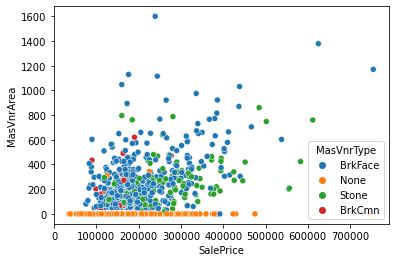

In [13]:
sns.scatterplot(data=data, x="SalePrice",y="MasVnrArea",hue="MasVnrType")

In [14]:
data[data["MasVnrArea"].isna()]["MasVnrType"]

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [15]:
data["MasVnrArea"].fillna(0,inplace=True)

# Fill Category data

In [16]:
# missing data
pd.DataFrame({"Missing":data[obj].isna().sum(),
              "Pourcentage":100*data[obj].isna().sum()/1460}).sort_values(by="Pourcentage",
                                                                                              ascending=False)

,Missing,Pourcentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945
BsmtFinType2,38,2.602740


all the missing data on PoolQC column concerns examples with PoolArea equal to 0. which means there is no pool in the house.
Then, we fill the missing data with NA


In [17]:
data["PoolQC"].fillna("NA",inplace=True)

We suppose that missing data for MiscFeature parameter concerns exemples with no additional feature.
we fill it with NA

In [18]:
data["MiscFeature"].fillna("NA",inplace=True)

Alley can be Gravel Paved or NA for no alley access to property.
Actually, most of propreties dont have anny alley access. We suppose that the missing data concerns examples without alley
same for Fence 

In [19]:
data["Alley"].fillna("NA",inplace=True)
data["Fence"].fillna("NA",inplace=True)

Missing data in fireplace quality correspond to fire place number=0.
We fill missing data with 'NA'

In [20]:
data[data["FireplaceQu"].isna()]["Fireplaces"].sum()

0

In [21]:
data["FireplaceQu"].fillna("NA",inplace=True)

Missing data for GarageCond, GarageQual, GarageFinish and GarageType concerns exemples without garage.
we fill this data with "NA"

In [22]:
data["GarageType"].fillna("NA",inplace=True)
data["GarageFinish"].fillna("NA",inplace=True)
data["GarageQual"].fillna("NA",inplace=True)
data["GarageCond"].fillna("NA",inplace=True)

In [23]:
data[data["BsmtExposure"].isna()][["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2"]]                                                            

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
17,NaN,NaN,NaN,NaN,0,NaN,0
39,NaN,NaN,NaN,NaN,0,NaN,0
90,NaN,NaN,NaN,NaN,0,NaN,0
102,NaN,NaN,NaN,NaN,0,NaN,0
156,NaN,NaN,NaN,NaN,0,NaN,0
182,NaN,NaN,NaN,NaN,0,NaN,0
259,NaN,NaN,NaN,NaN,0,NaN,0
342,NaN,NaN,NaN,NaN,0,NaN,0
362,NaN,NaN,NaN,NaN,0,NaN,0
371,NaN,NaN,NaN,NaN,0,NaN,0


to fill basment information we refer to BsmtQual which evaluates the height of the basment.
When the height is missing we consider that there is no basment at all and we will all the missing information related to basment with "NA" to say there is no basment

In [24]:
data["BsmtQual"].fillna("NA",inplace=True)
data["BsmtExposure"].fillna("NA",inplace=True)
data["BsmtFinType2"].fillna("NA",inplace=True)
data["BsmtCond"].fillna("NA",inplace=True)
data["BsmtFinType1"].fillna("NA",inplace=True)

                                                                                                              

As we filled the MasVnrArea with 0, we fill the corresponding MasVnrType with None

In [25]:
data["MasVnrType"].fillna("None",inplace=True)

Most commun electrical system is SBrkr. hence, we fill the only missing information with the same one

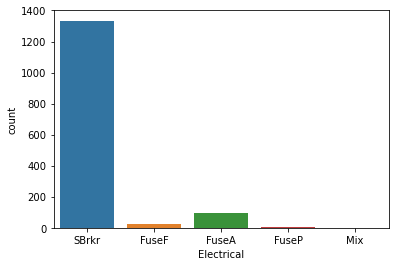

In [26]:


sns.countplot(data=data,x="Electrical")

In [27]:
data.Electrical.fillna("SBrkr",inplace=True)

The whole dataset is filled. No missing data are remaining at this point.

In [28]:
data.isna().sum().sum()

0

the data set is splited into x which contains all the features, and y with the prices of each example.

In [29]:
y=data.SalePrice
x=data.drop(["SalePrice","Id"],axis=1)

In [30]:
num.drop("GarageYrBlt")


Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

We extract dummies from the categorical features 

In [115]:
x=pd.get_dummies(x, columns=obj)

## Functions definition

Next, we work on some useful function before to start the prediction model design.

In [37]:
def preprocessing(model,scaler,x_columns,num=num,obj=obj,LotFrontage_fill=LotFrontage_fill):
    
    """"This Function preporcess a test dataset provided by kaggle to evaluate our model. 
    After dataset preprocessing, this function makes a prediction using "model" and save it on the appropriate
    file for kaggle submitions"""
    
    
    
    #import kaggle submition data
    data=pd.read_csv("test.csv")
    
    #Transform numeric to category features
    #replace numbers by quality description
    
    mapping={1:"VeryPoor", 2:"Poor", 3:"Fair", 4:"BelowAverage", 5:"Average", 6:"AboveAverage", 7:"Good", 8:"VeryGood",
                         9:"Excellent"}
    data=data.replace({ 'OverallQual':mapping,"OverallCond":mapping,})
    #string tranformation to numbers
    
    data.MSSubClass=data.MSSubClass.apply(lambda x: str(x))
    
    data.loc[data["LotFrontage"].isna(),"LotFrontage"] = data.loc[data["LotFrontage"].isna(),"Neighborhood"].apply(
    lambda x: LotFrontage_fill[x])
    
    data.drop("GarageYrBlt",axis=1,inplace=True)
    
    data["MasVnrArea"].fillna(0,inplace=True)
    #Categorical data
    
    data["PoolQC"].fillna("NA",inplace=True)
    data["MiscFeature"].fillna("NA",inplace=True)
    data["Alley"].fillna("NA",inplace=True)
    data["Fence"].fillna("NA",inplace=True)
    data["FireplaceQu"].fillna("NA",inplace=True)
    data["GarageType"].fillna("NA",inplace=True)
    data["GarageFinish"].fillna("NA",inplace=True)
    data["GarageQual"].fillna("NA",inplace=True)
    data["GarageCond"].fillna("NA",inplace=True)
    data["BsmtQual"].fillna("NA",inplace=True)
    data["BsmtExposure"].fillna("NA",inplace=True)
    data["BsmtFinType2"].fillna("NA",inplace=True)
    data["BsmtCond"].fillna("NA",inplace=True)
    data["BsmtFinType1"].fillna("NA",inplace=True)
    data["MasVnrType"].fillna("None",inplace=True)
    data.Electrical.fillna("SBrkr",inplace=True)
    
    x=data.drop("Id",axis=1)
    x=pd.get_dummies(x, columns=obj)
    for i in x_columns:
        if i not in x.columns:
            x[i]=0
    for i in x.columns:
        if i not in x_columns:
            x=x.drop(i,axis=1)
            print(i)
    x=x.fillna(0)
    x_notscaled=x        
    
    
    Prediction=np.abs(model.predict(x))
    print(Prediction)
    #create a dataframe with the appropriate kaggle submition format using prediction and PassengerId
    df=pd.DataFrame({"Id":data.Id,"SalePrice":Prediction})
    #save the dataframe into a csv file
    df.to_csv(r'C:\Users\greew\Documents\Kaggle\House pricing\Prediction.csv',index=False)
    
    print("CSV file ready for Kaggle submition")
    return x_notscaled
    

In [38]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, np.ravel(y), cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                      scoring=rmsle_score)
   
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

plt.show()

For model evaluation, we will use Root Mean Squared Log Error(RMSLE) metric and not Root Mean Squared Error metric (RMSE).
in the case of RMSE, the presence of outliers can explode the error term to a very high value. But, in the case of RMLSE the outliers are drastically scaled down therefore nullifying their effect.
As we might have some very special houses (houses with historical importance for instance) with a very high prices, RMSLE is a better metric for our problem 

In [39]:
def rmsle(real, prediction):
    """This function is used to make Root Mean Squared Log Error scorer"""
    squared_error=(np.log(real+1)-np.log(np.abs(prediction)+1))**2
    return (np.sqrt(squared_error.mean()))
rmsle_score = make_scorer(rmsle,greater_is_better=False)

In [40]:
def model_cv(model,x,y,learning_curves=False): 
    """This function splits a dataset into a training and testing sets, fit the provided model to the
    training set and score it on both training and testing sets
    This function can also plot the learning curves if the associated parameter is set to True"""
    
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)
    scaler=StandardScaler()
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    model.fit(x_train,y_train)
    predictions=np.abs(model.predict(x_test))
    test_score=rmsle(y_test, model.predict(x_test))
    train_score=rmsle(y_train,model.predict(x_train))
    print("Test score: ", test_score)
    print("Train score: ", train_score)
    if learning_curves:
        plot_learning_curve(model, model.__class__.__name__,x,y)
    return train_score, test_score, scaler

In [35]:
def predict(model,x,scal):
    """This function normalize the vector 'x' using the sacler 'scal' and make a prediction using 'model'
    The function returnes the absolute value of the prediction, as the house prices must be positive"""
    
    prediction=np.abs(model.predict(scal.transform(x)))
    return prediction
    

## Model selection


In [72]:
GBR=GradientBoostingRegressor(n_estimators=200,learning_rate=,max_depth=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\greew\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

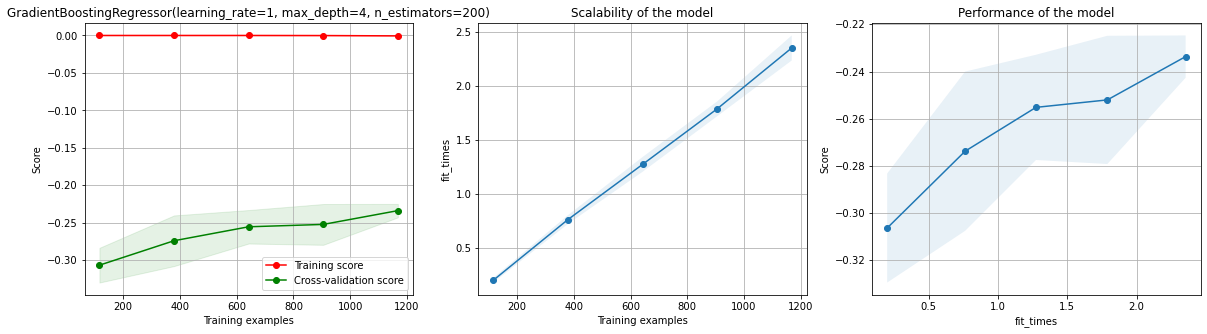

In [188]:
plot_learning_curve(GBR, GBR,x,y)

In [74]:
a,b,scal_GBR=model_cv(GBR,x,y)

Test score:  0.2444899396100277
Train score:  0.0006417795501691301


In [63]:
predict(GBR,x.head(5),scal_GBR)

array([205199.96680718, 175554.25047228, 211458.66710252, 138172.62712337,
       255972.45558351])

In [42]:
y.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

With the Gradient Boosting Regressor model, we are overfitting our training set. the model performs very poorly on the test set.
Next model will be Lasso regressor. A linear regression with regularization could be better for our problem


Test score:  0.15119953580285736
Train score:  0.09877597196492295


(0.09877597196492295, 0.15119953580285736, StandardScaler())

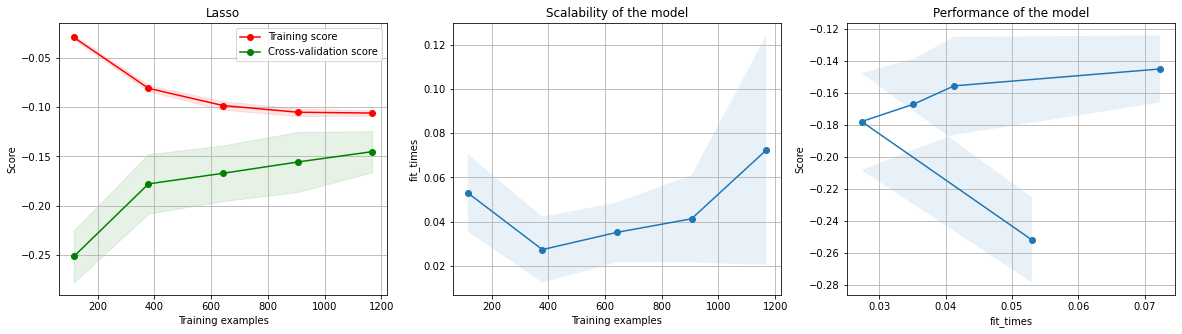

In [66]:
lasso=Lasso(max_iter=50000, alpha =50, random_state=1)
model_cv(lasso,x,y,True)

In [67]:
a,b,scal_lasso=model_cv(lasso,x,y)

Test score:  0.15119953580285736
Train score:  0.09877597196492295


In [68]:
predict(lasso,x.head(5),scal_lasso)

array([206969.4180854 , 205472.64697497, 211328.8154849 , 161266.77355529,
       290866.19419402])

C:\Users\greew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200337451311.63144, tolerance: 696659484.3571945
  model = cd_fast.enet_coordinate_descent(
C:\Users\greew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82912360.27490282, tolerance: 76172282.06507845
  model = cd_fast.enet_coordinate_descent(


Test score:  0.18063304882662232
Train score:  0.0988220964947962


C:\Users\greew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26994840523.29742, tolerance: 256218479.38223538
  model = cd_fast.enet_coordinate_descent(
C:\Users\greew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122366833866.44644, tolerance: 453626919.6856111
  model = cd_fast.enet_coordinate_descent(
C:\Users\greew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176974886372.39062, tolerance: 626233129.8688349
  model = cd_fast.enet_coordinate_descent(
C:\Users\greew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

(0.0988220964947962, 0.18063304882662232, StandardScaler())

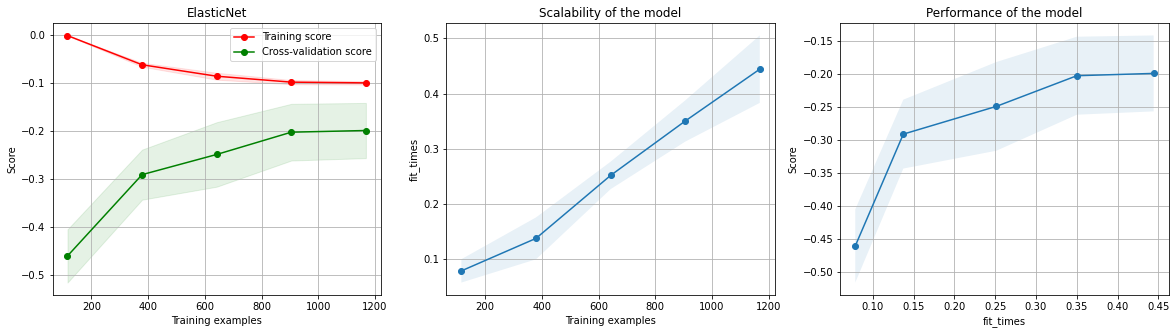

In [66]:
Enet=ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
model_cv(Enet,x,y,True)

Lasso and Elastic net perfomes better on the test set, than the Gradient boosting regressor. The overfitting problem is moderated with the regularization.
Next, we will fit 3 more models (Kernel Ridge with a polunomial kernel, desision tree regressor and an optimized gradient boosting regressor called XGBregressor) and make and select the best performing one from the 5 models

In [67]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [68]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [69]:
Xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [70]:
clf_list=[lasso,Enet,KRR,GBoost,Xgb]

In [71]:
df=pd.DataFrame()
df["clf"]=clf_list
test_list=[]
train_list=[]
for i in clf_list:
    train, test, scal= model_cv(i,x,y)
    test_list.append(test)
    train_list.append(train)
df["Test"]=test_list
df["Train"]=train_list

C:\Users\greew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200140502803.61832, tolerance: 696659484.3571945
  model = cd_fast.enet_coordinate_descent(


Test score:  0.1828081177697073
Train score:  0.09881519254413561


C:\Users\greew\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200337451311.63144, tolerance: 696659484.3571945
  model = cd_fast.enet_coordinate_descent(


Test score:  0.18063304882662232
Train score:  0.0988220964947962
Test score:  0.13647902390371072
Train score:  0.05718388964886326
Test score:  0.13990961555818102
Train score:  0.05475245101944213
[16:55:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test score:  0.14575210190748852
Train score:  0.019346834743979052


In [72]:
df

,clf,Test,Train
0,"Lasso(alpha=0.0005, random_state=1)",0.182808,0.098815
1,"ElasticNet(alpha=0.0005, l1_ratio=0.9, random_...",0.180633,0.098822
2,"KernelRidge(alpha=0.6, coef0=2.5, degree=2, ke...",0.136479,0.057184
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.139910,0.054752
4,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.145752,0.019347


Kernel Ridge and Decision Tree have the best scores on the test set.
XGBRegressor has nearly the same score on the test set and its performing much better on the train set 

In [132]:
GBoost = GradientBoostingRegressor(n_estimators=300, learning_rate=0.5,
                                   max_depth=6,
                                   min_samples_leaf=15, min_samples_split=5, 
                                   loss='huber', random_state =5)

## Feature importance

Now we will identify the most important feature for the model prediction.
We will plot the feature importance extracted from Gradient Boost Regressor

Test score:  0.17708664378154385
Train score:  0.030235807730834823


(0.030235807730834823, 0.17708664378154385, StandardScaler())

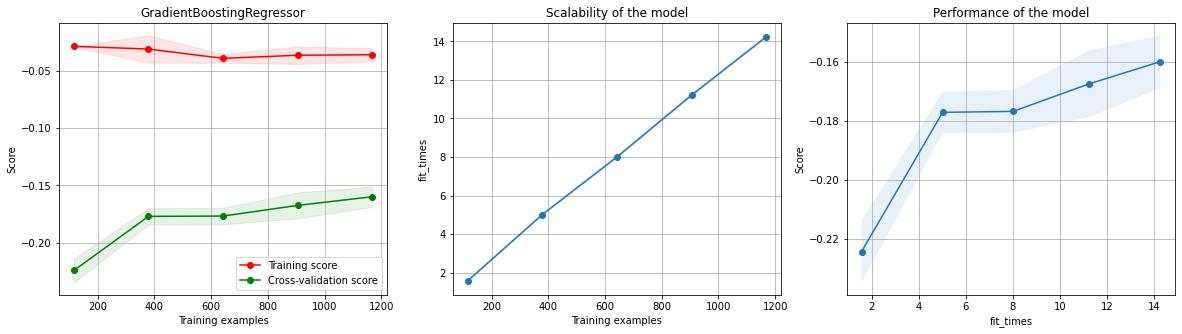

In [136]:
model_cv(GBoost,x,y,True)

In [ ]:
importance=pd.DataFrame({"Feature":x.columns,"Importance":GBoost.feature_importances_*100})

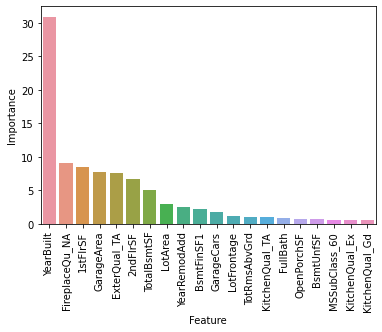

In [156]:
sns.barplot(data=importance.sort_values(by="Importance",ascending=False).head(20),x="Feature",y="Importance")
plt.xticks(rotation=90)
plt.show()


We can see that the most important feature is the year of built. This feature is far away from the others.
Next, we have 6 feature with more than 5% weigth on the prediction. These features are related to 1st and 2nd floor surface, garage area and the external quality of the house.


In [161]:
Predictions_GBR=pd.DataFrame({"SalePrice":y,"Prediction":predict(GBR,x,scal_GBR),"Model":["GBR" for i in range(len(y))]})

In [162]:
Predictions_Lasso=pd.DataFrame({"SalePrice":y,"Prediction":predict(lasso,x,scal_lasso),"Model":["Lasso" for i in range(len(y))]})

In [163]:
Pred_df=pd.concat([Predictions_Lasso,Predictions_GBR])

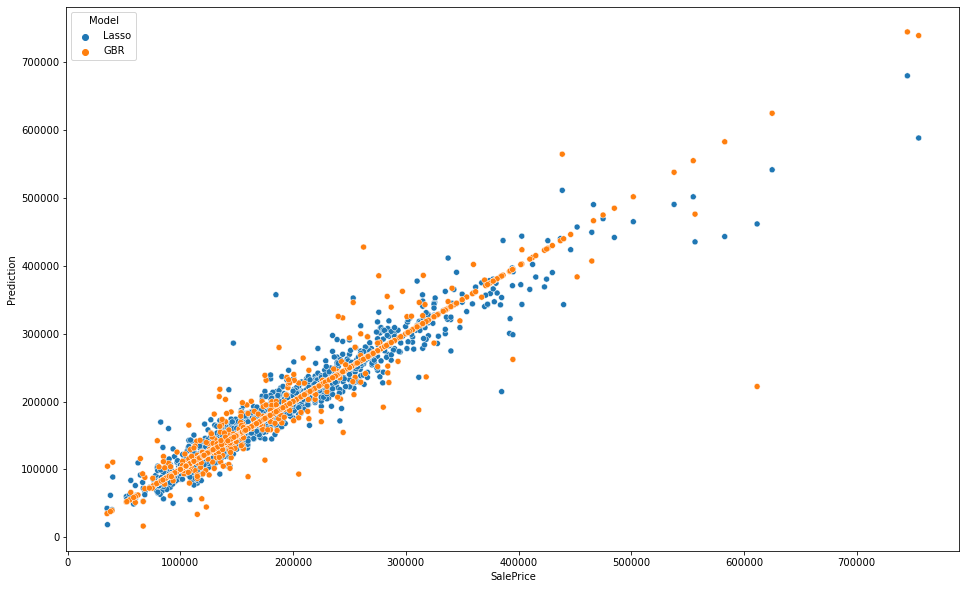

In [168]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=Pred_df,x="SalePrice",y="Prediction",hue="Model")


This plot shows the difference between the predictions and the real houses prices for Lasso and Gradient Boost regressor.
the more far is the pont from the diagonal, the bigger is the difference between the prediction and the real price.

The last interessting point to check before to show the result on kaggle, is the correlation matrix between the 10 most correlated features

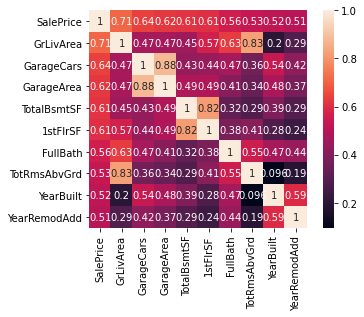

In [44]:
k = 10 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'SalePrice').index
cm = np.corrcoef(data[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can confirm the result shows by the feature importance plot. Indeed, the garage Area, basment area and the year of built are very correlated to house price.
The second point we can see on this matrix is the correlation between features. 
Garage area and Garage cars are very correlated which is understandable. the same thing between the ground living area and the number of rooms.
We can use this kind of correlation matrix to simplify our model and remove some non valuable features

## Kaggle Submission

In [143]:
preprocessing(GBR,scal,x.columns)

MSSubClass_150
CSV file ready for Kaggle submition


In [261]:
a,b,scal=model_cv(GBR,x,y)

Test score:  0.14062556355248074
Train score:  0.044862661883270094


In [262]:
preprocessing(GBR,scal,x.columns)

MSSubClass_150
[401435.67323385 403518.09364642 461619.94526498 ... 388463.52461024
 307052.46882496 456662.70399615]
CSV file ready for Kaggle submition


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,RoofMatl_Roll,Exterior1st_ImStucc,Exterior1st_Stone,Exterior2nd_Other,Heating_Floor,Heating_OthW,Electrical_Mix,GarageQual_Ex,PoolQC_Fa,MiscFeature_TenC
0,80.0,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,896,...,0,0,0,0,0,0,0,0,0,0
1,81.0,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,...,0,0,0,0,0,0,0,0,0,0
2,74.0,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,928,...,0,0,0,0,0,0,0,0,0,0
3,78.0,9978,1998,1998,20.0,602.0,0.0,324.0,926.0,926,...,0,0,0,0,0,0,0,0,0,0
4,43.0,5005,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,1970,1970,0.0,0.0,0.0,546.0,546.0,546,...,0,0,0,0,0,0,0,0,0,0
1455,21.0,1894,1970,1970,0.0,252.0,0.0,294.0,546.0,546,...,0,0,0,0,0,0,0,0,0,0
1456,160.0,20000,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,...,0,0,0,0,0,0,0,0,0,0
1457,62.0,10441,1992,1992,0.0,337.0,0.0,575.0,912.0,970,...,0,0,0,0,0,0,0,0,0,0


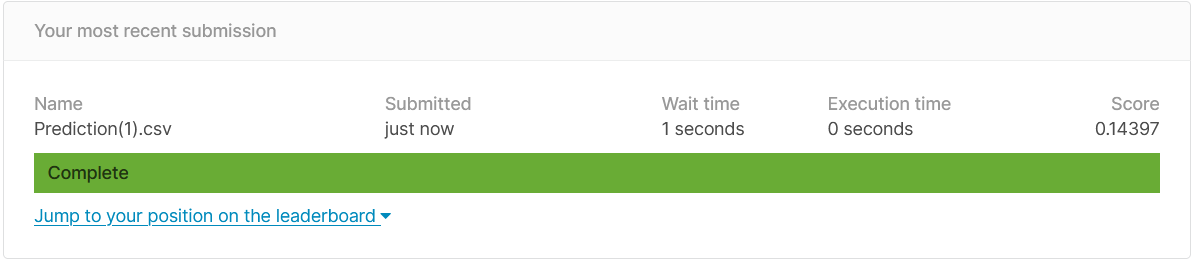
